In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
df = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-summary-latest.csv")

In [64]:
df.head(20)

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa
0,2020-12-27,ABR,135,71,64,115,18,2
1,2020-12-27,BAS,208,83,125,208,0,0
2,2020-12-27,CAL,274,147,127,272,2,0
3,2020-12-27,CAM,719,422,297,711,8,0
4,2020-12-27,EMR,963,368,595,588,349,26
5,2020-12-27,FVG,265,149,116,265,0,0
6,2020-12-27,ITA,7420,3549,3871,6578,521,321
7,2020-12-27,LAZ,179,91,88,178,1,0
8,2020-12-27,LIG,135,59,76,102,3,30
9,2020-12-27,LOM,766,457,309,731,23,12


In [65]:
df = df.loc[df["area"]=="PUG"]

In [66]:
df.head()

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa
15,2020-12-27,PUG,555,279,276,482,11,62
58,2020-12-31,PUG,1274,618,656,1202,56,16
72,2021-01-01,PUG,179,77,102,179,0,0
92,2021-01-02,PUG,2903,1278,1625,2789,106,8
112,2021-01-03,PUG,1921,907,1014,1797,57,67


In [67]:
df = df[['area', 'totale']]

In [68]:
df.head()

,area,totale
15,PUG,555
58,PUG,1274
72,PUG,179
92,PUG,2903
112,PUG,1921


In [69]:
for i in range(0,df.shape[0]-2):
    df.loc[df.index[i+2],'SMA_3'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

In [70]:
df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

In [71]:
df.head()

,area,totale,SMA_3,pandas_SMA_3
15,PUG,555,NaN,NaN
58,PUG,1274,NaN,NaN
72,PUG,179,669.3,669.333333
92,PUG,2903,1452.0,1452.000000
112,PUG,1921,1667.7,1667.666667


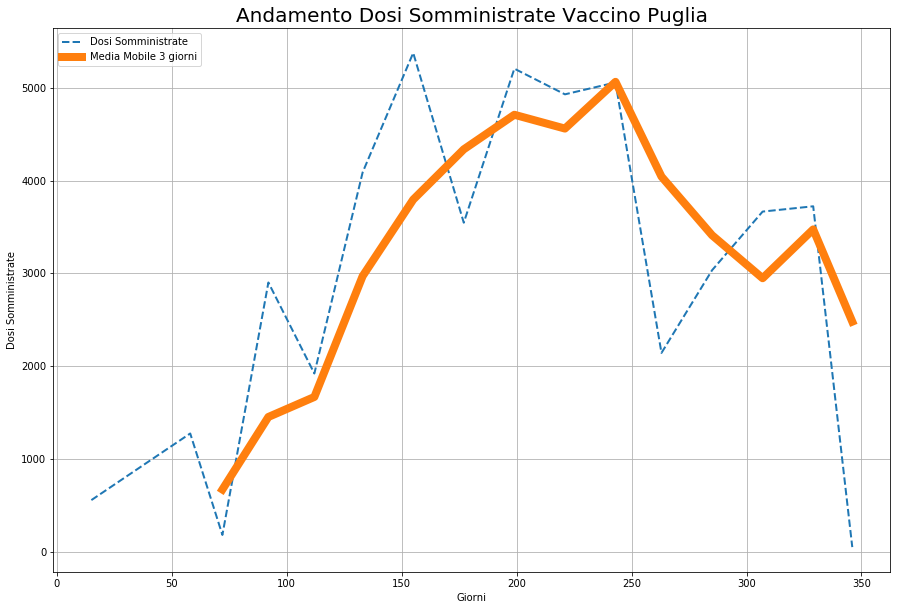

In [72]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['totale'],label='Dosi Somministrate', linewidth=2, linestyle='--')
plt.plot(df['SMA_3'],label='Media Mobile 3 giorni', linewidth=8)
plt.xlabel('Giorni')
plt.ylabel('Dosi Somministrate')
plt.title("Andamento Dosi Somministrate Vaccino Puglia", fontsize=20)
plt.legend(loc=2)

In [73]:
for i in range(0,df.shape[0]-6):
    df.loc[df.index[i+6],'SMA_7'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1]+df.iloc[i+3,1]+ df.iloc[i+4,1]+ df.iloc[i+5,1]+ df.iloc[i+6,1])/7),1)

In [74]:
df['pandas_SMA_7'] = df.iloc[:,1].rolling(window=7).mean()

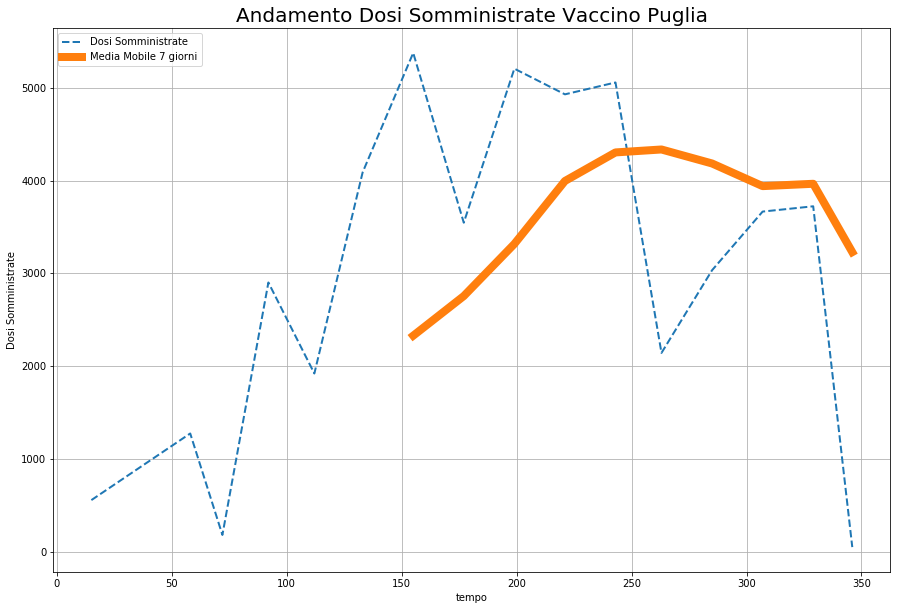

In [75]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['totale'],label='Dosi Somministrate', linewidth=2, linestyle='--')
plt.plot(df['SMA_7'],label='Media Mobile 7 giorni', linewidth=8)
plt.xlabel('Tempo')
plt.ylabel('Dosi Somministrate')
plt.title("Andamento Dosi Somministrate Vaccino Puglia", fontsize=20)
plt.legend(loc=2)